Largely taken from James Dawson at https://spacemeerkat.wordpress.com/

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.spatial.distance import cdist

In [3]:
# import datetime

# now = datetime.datetime.now()

# print ()
# print ("Current date and time using str method of datetime object:")
# print (str(now))

In [4]:
# savepath = "C:/Users/C1838736/Documents/ATH_PhD/_PhD_Output/Machine_Learning/GP"

# save_date = str(now.strftime("%Y-%m-%d")) # %H:%M"))

savepath = "" #savepath + "/" + save_date +"/"

print(savepath)

In [5]:
x_prior = np.linspace(-10.0,20.0,500)
x_prior = x_prior.reshape(-1,1)
x_prior.shape

(500, 1)

In [6]:
def exp_kernel (x,y, sigma, length_scale):
	K = (sigma**2) * np.exp((-0.5*(cdist(x,y)**2))/(length_scale**2))
	return K

In [7]:
mu_data = np.zeros(x_prior.shape)
#mu_data += prior_mu

In [8]:
exp_kernel(x_prior, x_prior, sigma = 1.0, length_scale = 1.0).shape

(500, 500)

In [9]:
def gaussian_process(kernel, mu, x, y, sigma, length_scale, samples):
    f = np.random.multivariate_normal(mu.flatten(), kernel(x,y, sigma, length_scale), samples)
    return f

In [10]:
n_samples = 5
f = gaussian_process(exp_kernel, mu_data, x_prior, x_prior, sigma = 1.0, length_scale = 1.0, samples = n_samples)

In [11]:
f.shape

(5, 500)

5_functions_sampled_from_Gaussian_Process


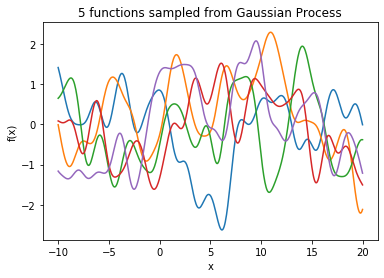

In [12]:
fig1=plt.gcf()
plt.plot(x_prior,f.T)
plt.xlabel('x')
plt.ylabel('f(x)')
strng = '{0} functions sampled from Gaussian Process'.format(n_samples)
plt.title(strng)
strng = strng.split(" ")
strng = "_".join(strng)
print(strng)
# fig1.savefig(savepath + strng + ".png")
plt.show()

Now we have created our Gaussian Process, we have the possibility of accessing any function, centred in a gaussian about mu, with SD sigma, with each point in independent co-ordinate x being equally gaussian.

To show the trend of the GP with many samples:

(500, 1)
(500, 2000)
Gaussian_Trend_of_many_functions_sampled_from_Gaussian_Process


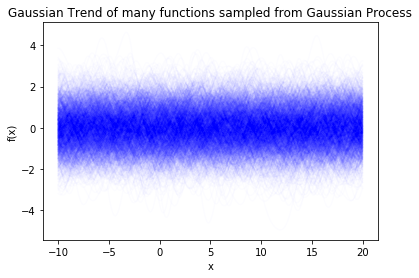

In [16]:
f2 = gaussian_process(exp_kernel, mu_data, x_prior, x_prior, sigma = 1.0, length_scale = 1.0, samples = 2000)

fig1=plt.gcf()
plt.plot(x_prior,f2.T, alpha=0.01, color = 'blue')
print(np.shape(x_prior))
print(np.shape(f2.T))
plt.xlabel('x')
plt.ylabel('f(x)')
strng = 'Gaussian Trend of many functions sampled from Gaussian Process'
plt.title(strng)
strng = strng.split(" ")
strng = "_".join(strng)
print(strng)
# fig1.savefig(savepath + strng + ".png")
plt.show()

Now to do some learning! =D

In [14]:
from random import shuffle

In [15]:
n_training_points = 25
n_training_points += 1
x_train = np.linspace(-10.,10.0,n_training_points)
shuffle(x_train)
x_train = x_train.reshape(-1,1)

y_train = list(map(lambda x: np.cos(x),x_train))#np.exp((-1.)*(x**2)),x_train))#x: x**3 + x**2 + x + 1.,x_train))

**p(y'|y) ~ N**( k(x',x) (k(x,x) + (sigma^2)I)^(-1) y **,** k(x',x') - k(x',x) (k + (sigma^2)I)^(-1) k(x,x).T)

In [15]:
def posterior(x_train,y_train,x_prior,samples,introduced_err=0.0):

    k_tt = exp_kernel(x_train , x_train , 1.,1.)
    k_pp = exp_kernel(x_prior , x_prior , 1.,1.)
    k_pt = exp_kernel(x_prior , x_train , 1.,1.)
    k_tp = exp_kernel(x_train , x_prior , 1.,1.) ## = k_tp transpose

    mean_function = np.dot(np.dot(k_pt ,np.linalg.inv(k_tt+((introduced_err**2)*np.eye(len(x_train))) )) , y_train)

    covariance_function = k_pp - np.dot(np.dot(k_pt ,np.linalg.inv(k_tt + ((introduced_err**2)*np.eye(len(x_train))))) , k_tp)

    post = np.random.multivariate_normal(mean_function[:,0],covariance_function , samples)

    std = np.diag(covariance_function)

    return mean_function,covariance_function,post,std

In [16]:
sigma = 0.5

Posterior_Probability_after_1_data_points_Gaussian_Process_ML_with_0.5_sigma_noise


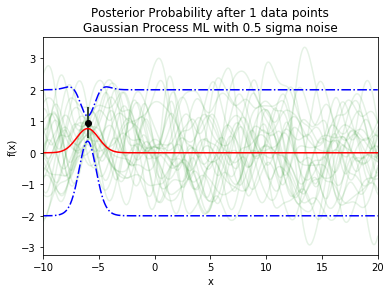

Posterior_Probability_after_6_data_points_Gaussian_Process_ML_with_0.5_sigma_noise


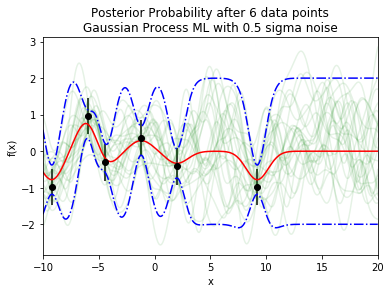

Posterior_Probability_after_11_data_points_Gaussian_Process_ML_with_0.5_sigma_noise


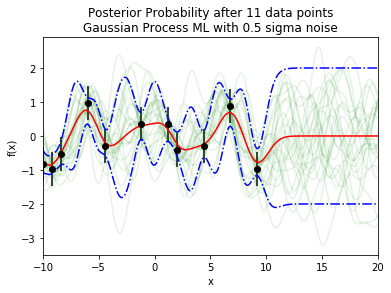

Posterior_Probability_after_16_data_points_Gaussian_Process_ML_with_0.5_sigma_noise


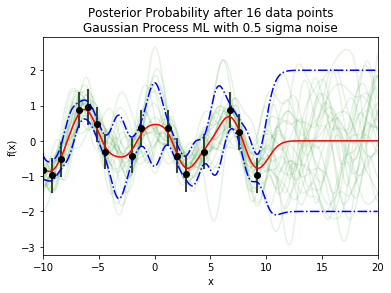

Posterior_Probability_after_21_data_points_Gaussian_Process_ML_with_0.5_sigma_noise


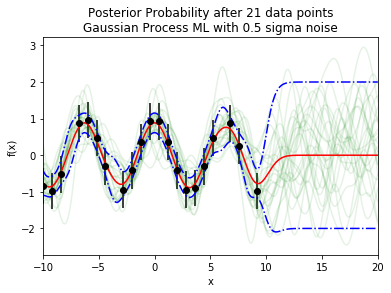

Posterior_Probability_after_26_data_points_Gaussian_Process_ML_with_0.5_sigma_noise


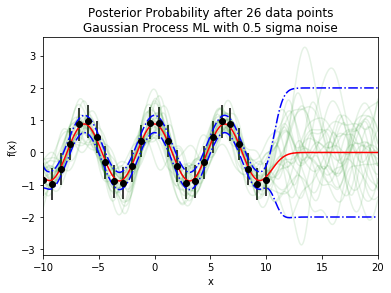

In [17]:
for data_point in range(1,n_training_points+1,5):
    mean_function,covariance_function,post,std = posterior(x_train[0:data_point] \
   ,y_train[0:data_point],x_prior,samples = 25, introduced_err= sigma)
    
    
    plt.figure(data_point)
    fig1 = plt.gcf()
    
    for i in range(len(post)):
        plt.plot(x_prior,post[i,:],'g-',alpha=0.1)

    plt.errorbar(x_train[0:data_point],y_train[0:data_point], yerr=sigma,color='k',fmt='o')

    plt.plot(x_prior , mean_function.flat, 'r-')
    plt.plot(x_prior , mean_function.flat + (2*std), 'b-.')
    plt.plot(x_prior , mean_function.flat - (2*std), 'b-.')
    plt.xlim(-10.,20.0)
    
#    y1 = mean_function[:,0] - (2*std)
#    y2 = mean_function[:,0] - (2*std)

    plt.xlabel('x')
    plt.ylabel('f(x)')  
    strng = f"""Posterior Probability after {data_point} data points"""
    strng2 = f"""Gaussian Process ML with {sigma} sigma noise"""
    plt.title(strng + '\n' + strng2)
    strng = strng + '_' + strng2
    strng = strng.split(" ")
    strng = "_".join(strng)
    print(strng)
#     fig1.savefig(savepath + strng + ".png")
    plt.show()


